# Polyolefin InfraRed Classification - Analysis of Default Classifiers

In connection with: add DOI INFO/LINK HERE

This code was predominantly produced by Bradley P. Sutliff, with assistance from Tyler B. Martin, and Debra Audus

This notebook is provided in an effort to further open research initiatives and to further the circular economy.

Please direct any questions to Bradley.Sutliff@nist.gov

## Setup

In [1]:
save_files = True
img_type = "pdf"
img_style = 'paper'

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# set up notebook for plotting nicely
%matplotlib inline
# contxt = "talk"
# sns.set(context=contxt, style="ticks", palette="bright")
style_dict = {'paper':'seaborn-v0_8-paper',
              'talk':'seaborn-v0_8-talk'}
plt.style.use(style_dict[img_style])

pd.options.display.html.use_mathjax = False  # don't render table values as LaTeX
mpl.rcParams['figure.dpi'] = 300

## Import the scores generated from our classification script

It is assumed that the data and code are now set up in the following directory structure.:

```
Main  
  ├ *.ipynb  
  ├ Data  
  |  ├ SampleInformation.csv  
  |  └ NIR  
  |    ├ N1476LDPE_1.csv  
  |    ├ ...  
  |    └ H0009PP_7.csv  
  ├ Scripts  
  |  ├ *.py  
  |  ├ *.sh  
  |  └ *.ps1
  ├ NetCDFs
  |   └ *.nc
  └ ClassifierScores
     ├ AllColors-AllStates_None1_None2_None3_None4_None5_None6.csv
     ├ ...
     └ AllColors-AllStates_RNV_Detrending_SG2_L2_StandardScaler_UMAP.csv

```

In [3]:
from os import listdir
from os.path import isfile, join

# file_path = 'ClassifierScores/by_pipe/ReRun/'
file_path = 'ClassifierScores/'
filelist = [f for f in listdir(file_path) if isfile(join(file_path, f))]
filelist = [f for f in filelist if ".DS_" not in f] # remove this autogenerated file if on Mac)

If you ran all of the pipelines, it should produce 1152 files, one for each preprocessing pipeline. Then each file should have 11 rows, 1 for each classifier. When combined, you should have a dateframe with 12672 rows

In [4]:
len(filelist)

1152

In [5]:
import pandas as pd
from tqdm import tqdm

df = pd.DataFrame()

for file in tqdm(filelist, position=0, leave=True):

    # add in extra metadata from filename/filepath
    df = pd.concat([df, pd.read_csv(file_path+file)])

df['Data_Pipe'] = df['Data'] + '_' + df['Preprocessing']
df['Full_Pipe'] = df['Data_Pipe']+'_'+df['Classifier']

#if you've run things multiple times you may have duplicates, so we'll drop duplicates just in case
df = df.loc[~df.duplicated(),:]

100%|█████████████████████████████████████████████████████████████████████████████| 1152/1152 [00:01<00:00, 871.77it/s]


Check our dataframe size:

In [6]:
df.shape

(12672, 17)

## Sort our values to see the top scorers

In [7]:
df.sort_values(by='F1_weighted', ascending=False).head()

Unnamed: 0                 Data  \
6           6  AllColors-AllStates   
6           6  AllColors-AllStates   
6           6  AllColors-AllStates   
6           6  AllColors-AllStates   
6           6  AllColors-AllStates   

                                   Preprocessing Classifier  Accuracy  \
6  MeanCentering_None2_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   
6       RNV_Detrending_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   
6     None1_Detrending_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   
6       SNV_Detrending_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   
6            SNV_None2_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   

   Precision_micro  Recall_micro  F1_micro  Precision_macro  Recall_macro  \
6             0.97          0.97      0.97         0.974067      0.976845   
6             0.97          0.97      0.97         0.974067      0.976845   
6             0.97          0.97      0.97         0.974067      0.976845   
6             0.97          0.97      0.97         0.974067      0.976845   
6             0.97          0.97      0.97         0.974067      0.976845   

   F1_macro  Precision_weighted  Recall_weighted  F1_weighted  \
6  0.974715               0.971             0.97     0.970046   
6  0.974715               0.971             0.97     0.970046   
6  0.974715               0.971             0.97     0.970046   
6  0.974715               0.971             0.97     0.970046   
6  0.974715               0.971             0.97     0.970046   

                                             Warning  \
6  [ConvergenceWarning('Liblinear failed to conve...   
6  [ConvergenceWarning('Liblinear failed to conve...   
6  [ConvergenceWarning('Liblinear failed to conve...   
6  [ConvergenceWarning('Liblinear failed to conve...   
6  [ConvergenceWarning('Liblinear failed to conve...   

                                           Data_Pipe  \
6  AllColors-AllStates_MeanCentering_None2_SG1_L2...   
6  AllColors-AllStates_RNV_Detrending_SG1_L2_MinM...   
6  AllColors-AllStates_None1_Detrending_SG1_L2_Mi...   
6  AllColors-AllStates_SNV_Detrending_SG1_L2_MinM...   
6  AllColors-AllStates_SNV_None2_SG1_L2_MinMaxSca...   

                                           Full_Pipe  
6  AllColors-AllStates_MeanCentering_None2_SG1_L2...  
6  AllColors-AllStates_RNV_Detrending_SG1_L2_MinM...  
6  AllColors-AllStates_None1_Detrending_SG1_L2_Mi...  
6  AllColors-AllStates_SNV_Detrending_SG1_L2_MinM...  
6  AllColors-AllStates_SNV_None2_SG1_L2_MinMaxSca...

In [8]:
df.sort_values(by='Accuracy', ascending=False).head()

Unnamed: 0                 Data  \
6           6  AllColors-AllStates   
6           6  AllColors-AllStates   
6           6  AllColors-AllStates   
6           6  AllColors-AllStates   
4           4  AllColors-AllStates   

                                   Preprocessing Classifier  Accuracy  \
6            SNV_None2_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   
6       RNV_Detrending_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   
6       SNV_Detrending_SG1_L1_MinMaxScaler_None6  LinearSVC      0.97   
6  MeanCentering_None2_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   
4        None1_None2_SG_None4_MinMaxScaler_None6        LDA      0.97   

   Precision_micro  Recall_micro  F1_micro  Precision_macro  Recall_macro  \
6             0.97          0.97      0.97         0.974067      0.976845   
6             0.97          0.97      0.97         0.974067      0.976845   
6             0.97          0.97      0.97         0.974067      0.976845   
6             0.97          0.97      0.97         0.974067      0.976845   
4             0.97          0.97      0.97         0.974786      0.967460   

   F1_macro  Precision_weighted  Recall_weighted  F1_weighted  \
6  0.974715            0.971000             0.97     0.970046   
6  0.974715            0.971000             0.97     0.970046   
6  0.974715            0.971000             0.97     0.970046   
6  0.974715            0.971000             0.97     0.970046   
4  0.969275            0.972026             0.97     0.969545   

                                             Warning  \
6  [ConvergenceWarning('Liblinear failed to conve...   
6  [ConvergenceWarning('Liblinear failed to conve...   
6  [ConvergenceWarning('Liblinear failed to conve...   
6  [ConvergenceWarning('Liblinear failed to conve...   
4                                                 []   

                                           Data_Pipe  \
6  AllColors-AllStates_SNV_None2_SG1_L2_MinMaxSca...   
6  AllColors-AllStates_RNV_Detrending_SG1_L2_MinM...   
6  AllColors-AllStates_SNV_Detrending_SG1_L1_MinM...   
6  AllColors-AllStates_MeanCentering_None2_SG1_L2...   
4  AllColors-AllStates_None1_None2_SG_None4_MinMa...   

                                           Full_Pipe  
6  AllColors-AllStates_SNV_None2_SG1_L2_MinMaxSca...  
6  AllColors-AllStates_RNV_Detrending_SG1_L2_MinM...  
6  AllColors-AllStates_SNV_Detrending_SG1_L1_MinM...  
6  AllColors-AllStates_MeanCentering_None2_SG1_L2...  
4  AllColors-AllStates_None1_None2_SG_None4_MinMa...

## How many do we lose if we remove some of the errors/warnings?

In [9]:
sub_df = df.loc[~df["Warning"].isin(["[RuntimeWarning('divide by zero encountered in double_scalars')]",
                                  "[RuntimeWarning('divide by zero encountered in divide')]",
                                  "[UserWarning('Variables are collinear')]"]), :]
sub_df.shape

(11520, 17)

### What exactly are all of our errors?

In [10]:
sub_df3 = df.loc[~(df["Warning"].isin(["[]"])), :]
sub_df3["Warning"].value_counts()

Warning
[UserWarning('Variables are collinear')]                                                                                                                1152
[FutureWarning('The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.')]    1152
[ConvergenceWarning('Liblinear failed to converge, increase the number of iterations.')]                                                                 285
Name: count, dtype: int64

### If we only keep the classifiers that had no warnings for any of their metrics, what are we left with?

In [11]:
sub_df2 = df.loc[df["Warning"].isin(["[]"]), :]
sub_df2.shape

(10083, 17)

None of these warnings is terrible, so we can keep using those runs, but we should keep this in mind as we proceed to tune our model.

## Plot our results

### Precision vs Recall

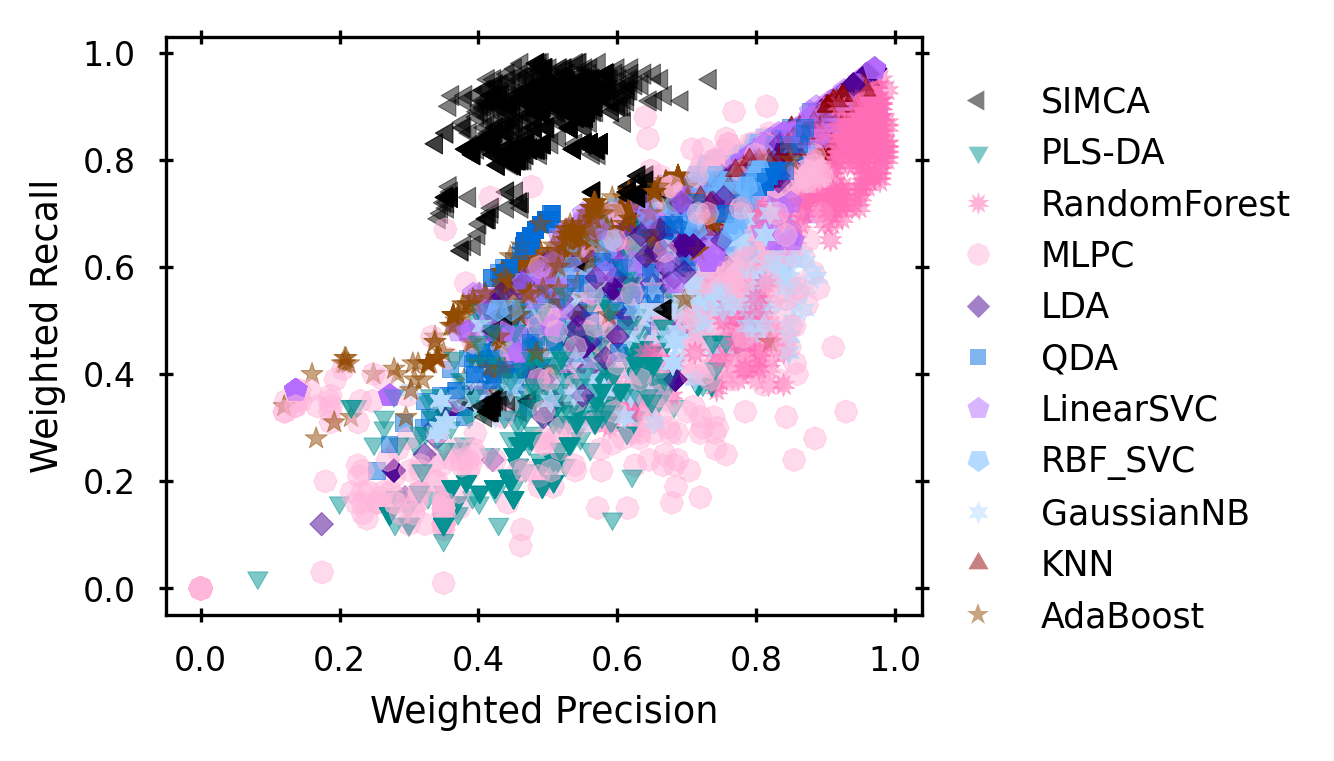

In [12]:
import Scripts.misc_funcs as misc
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))

avrg = 'weighted'

#select data
x = df[f'Precision_{avrg}']
y = df[f'Recall_{avrg}']
col_vec = df['Classifier'].map(misc.dict_cBlind['classifiers'])
shape_vec = df['Classifier'].map(misc.dict_shapes['classifiers'])

# add the data
# note: fix_markers is a custom function
myscatter=ax.scatter(x, y, color=col_vec, alpha=0.5)
misc.fix_markers2(myscatter, shape_vec)

# adjust axis
# ax.set_xlabel(f'Precision_{avrg}')
# ax.set_ylabel(f'Recall_{avrg}')
ax.set_xlabel(f'{avrg} Precision'.title())
ax.set_ylabel(f'{avrg} Recall'.title())
ax.tick_params(
    bottom=True,
    top=True,
    left=True,
    right=True,
    labelbottom=True,
    labeltop=False,
    labelleft=True,
    labelright=False,
    direction="inout",
)

# fix the legend
leg_elems = [Line2D([0], [0],
                   lw=0,
                   color=misc.dict_cBlind['classifiers'][key],
                   marker=misc.dict_shapes['classifiers'][key],
                   alpha=0.5,
                   label=key)
             for key in df['Classifier'].unique()
            ]

fig.legend(handles=leg_elems,
           loc="center",
           fontsize='small',
           bbox_to_anchor=[1.1, 0.45],
           frameon=False,
          )

if save_files==True:
    #check for location to save data
    import os
    newpath = r'Figures/Examples/'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    fig.savefig(f'{newpath}/PrecVsRecall_{avrg}.{img_type}', dpi=1200, bbox_inches='tight')

### F1 vs Accuracy

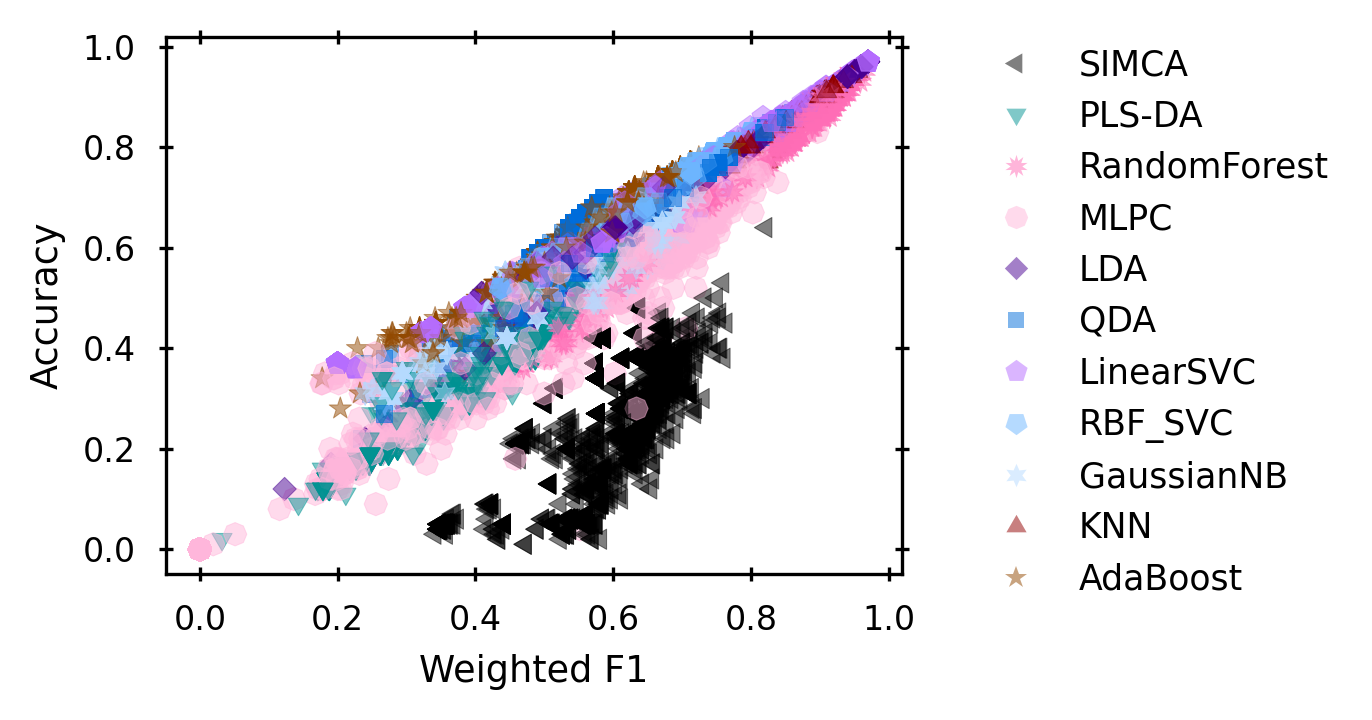

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))

avrg = 'weighted'

#select data
x = df[f'F1_{avrg}']
y = df[f'Accuracy']
col_vec = df['Classifier'].map(misc.dict_cBlind['classifiers'])
shape_vec = df['Classifier'].map(misc.dict_shapes['classifiers'])

# add the data
# note: fix_markers is a custom function
myscatter=ax.scatter(x, y, color=col_vec, alpha=0.5)
misc.fix_markers2(myscatter, shape_vec)

# adjust axis

ax.set_xlabel(f'{avrg} F1'.title())
ax.set_ylabel(f'Accuracy'.title())
ax.tick_params(
    bottom=True,
    top=True,
    left=True,
    right=True,
    labelbottom=True,
    labeltop=False,
    labelleft=True,
    labelright=False,
    direction="inout",
)

# fix the legend
leg_elems = [
    Line2D([0], [0],
           lw=0,
           color=misc.dict_cBlind['classifiers'][key],
           marker=misc.dict_shapes['classifiers'][key],
           alpha=0.5,
           label=key)
    for key in df['Classifier'].unique()
]

#leg_elems = leg_elem_colors + leg_elem_shapes
fig.legend(
    handles=leg_elems,
    loc="center",
    fontsize='small',
    bbox_to_anchor=[1.2, 0.55],
    frameon=False,
)

plt.tight_layout()

if save_files==True:
    fig.savefig(f'{newpath}/AccuracyVsF1_{avrg}.{img_type}', dpi=1200, bbox_inches='tight')

## Precision vs Recall and Acc v F1 with only the Non-Warning/Non-Error Models

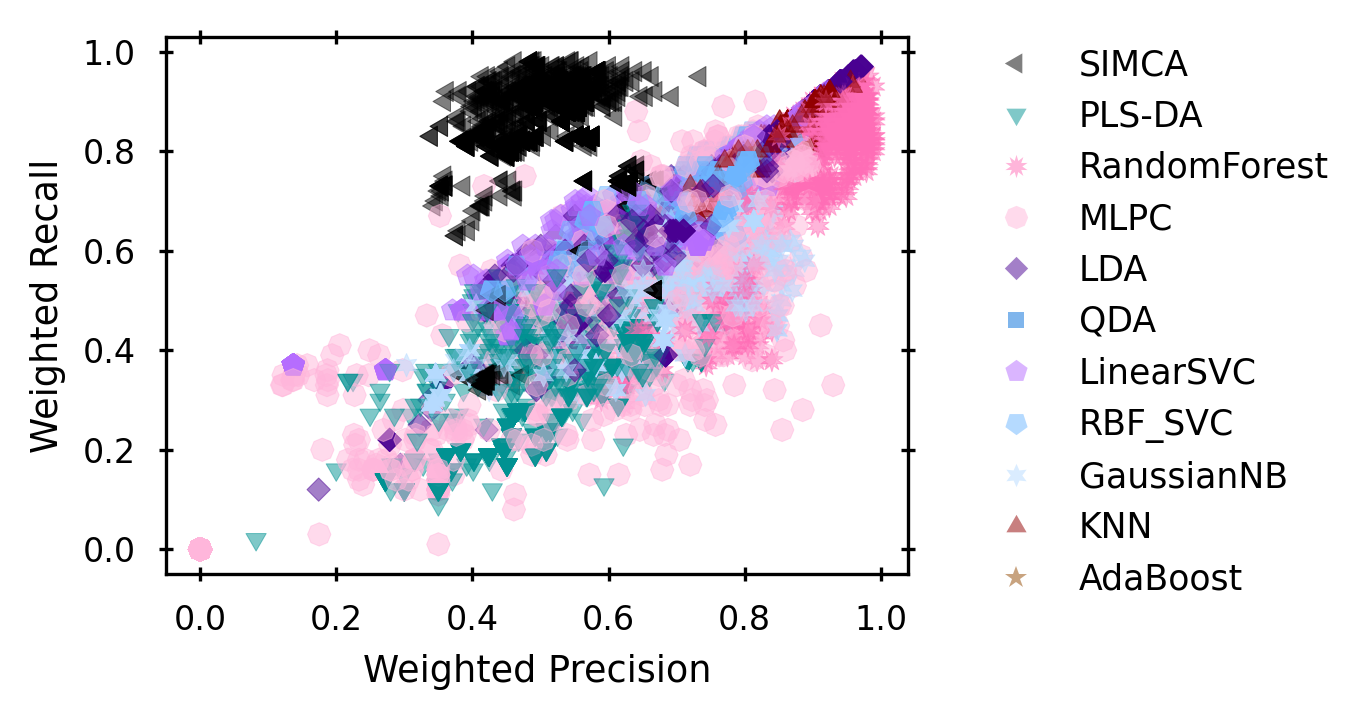

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))

avrg = 'weighted'

#select data
x = sub_df2[f'Precision_{avrg}']
y = sub_df2[f'Recall_{avrg}']
col_vec = sub_df2['Classifier'].map(misc.dict_cBlind['classifiers'])
shape_vec = sub_df2['Classifier'].map(misc.dict_shapes['classifiers'])

# add the data
# note: fix_markers is a custom function
myscatter=ax.scatter(x, y, color=col_vec, alpha=0.5)
misc.fix_markers2(myscatter, shape_vec)

# adjust axis
# ax.set_xlabel(f'Precision_{avrg}')
# ax.set_ylabel(f'Recall_{avrg}')
ax.set_xlabel(f'{avrg} Precision'.title())
ax.set_ylabel(f'{avrg} Recall'.title())
ax.tick_params(
    bottom=True,
    top=True,
    left=True,
    right=True,
    labelbottom=True,
    labeltop=False,
    labelleft=True,
    labelright=False,
    direction="inout",
)

# fix the legend
leg_elems = [
    Line2D([0], [0],
           lw=0,
           color=misc.dict_cBlind['classifiers'][key],
           marker=misc.dict_shapes['classifiers'][key],
           alpha=0.5,
           label=key)
    for key in df['Classifier'].unique()
]

#leg_elems = leg_elem_colors + leg_elem_shapes
fig.legend(
    handles=leg_elems,
    loc="center",
    fontsize='small',
    bbox_to_anchor=[1.2, 0.55],
    frameon=False,
)

plt.tight_layout()

if save_files==True:
    fig.savefig(f'{newpath}/PrecVsRecall_{avrg}_NoErrors.{img_type}', dpi=1200, bbox_inches='tight')

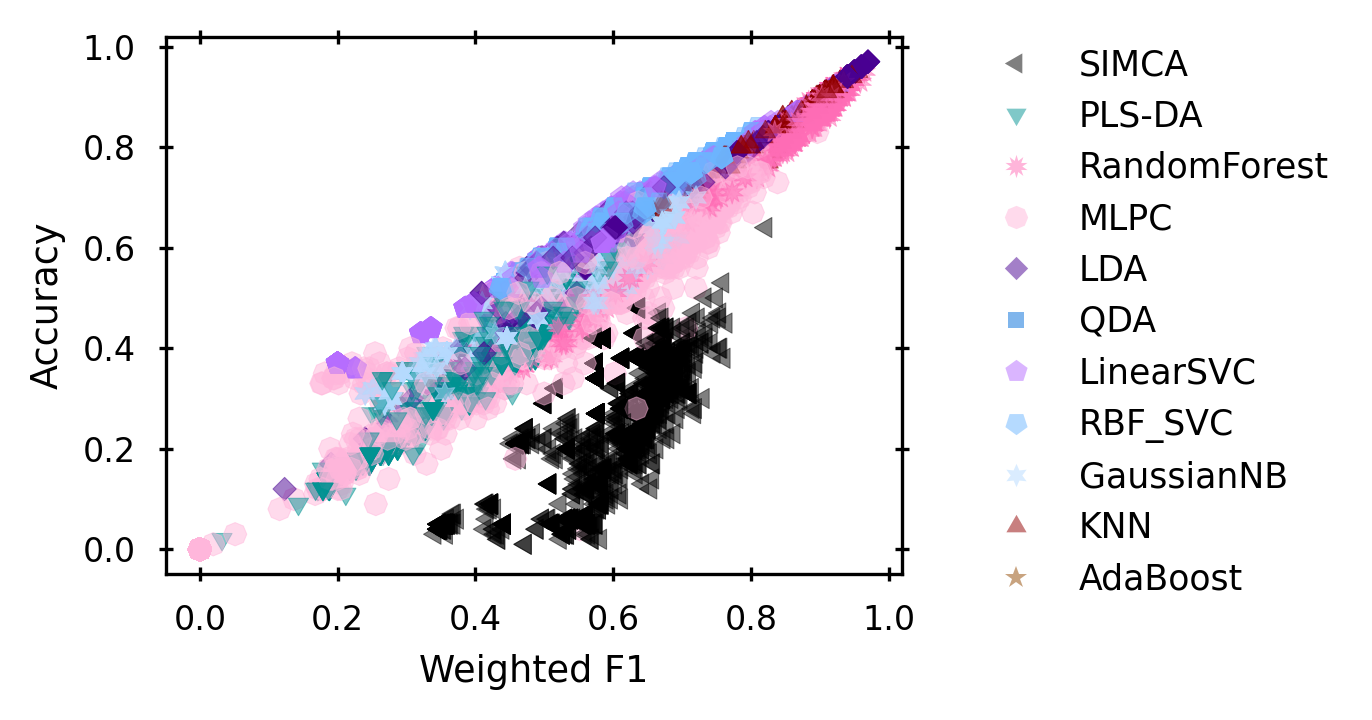

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))

avrg = 'weighted'

#select data
x = sub_df2[f'F1_{avrg}']
y = sub_df2[f'Accuracy']
col_vec = sub_df2['Classifier'].map(misc.dict_cBlind['classifiers'])
shape_vec = sub_df2['Classifier'].map(misc.dict_shapes['classifiers'])

# add the data
# note: fix_markers is a custom function
myscatter=ax.scatter(x, y, color=col_vec, alpha=0.5)
misc.fix_markers2(myscatter, shape_vec)

# adjust axis
# ax.set_xlabel(f'Precision_{avrg}')
# ax.set_ylabel(f'Recall_{avrg}')
ax.set_xlabel(f'{avrg} F1'.title())
ax.set_ylabel(f'Accuracy'.title())
ax.tick_params(
    bottom=True,
    top=True,
    left=True,
    right=True,
    labelbottom=True,
    labeltop=False,
    labelleft=True,
    labelright=False,
    direction="inout",
)

# fix the legend
leg_elems = [
    Line2D([0], [0],
           lw=0,
           color=misc.dict_cBlind['classifiers'][key],
           marker=misc.dict_shapes['classifiers'][key],
           alpha=0.5,
           label=key)
    for key in df['Classifier'].unique()
]

fig.legend(
    handles=leg_elems,
    loc="center",
    fontsize='small',
    bbox_to_anchor=[1.2, 0.55],
    frameon=False,
)

plt.tight_layout()

if save_files==True:
    fig.savefig(f'{newpath}/F1vsAccuracy_{avrg}_NoError.{img_type}', dpi=1200, bbox_inches='tight')

Overall we can see that the SIMCA model behaves very differently than everything else, probably because it can provide multiple labels to the same sample. RandomForest, LinearSVC, and LDA all seem to provide consistently good results too.

## Violin plots to compare the overall spread of the results per classifier

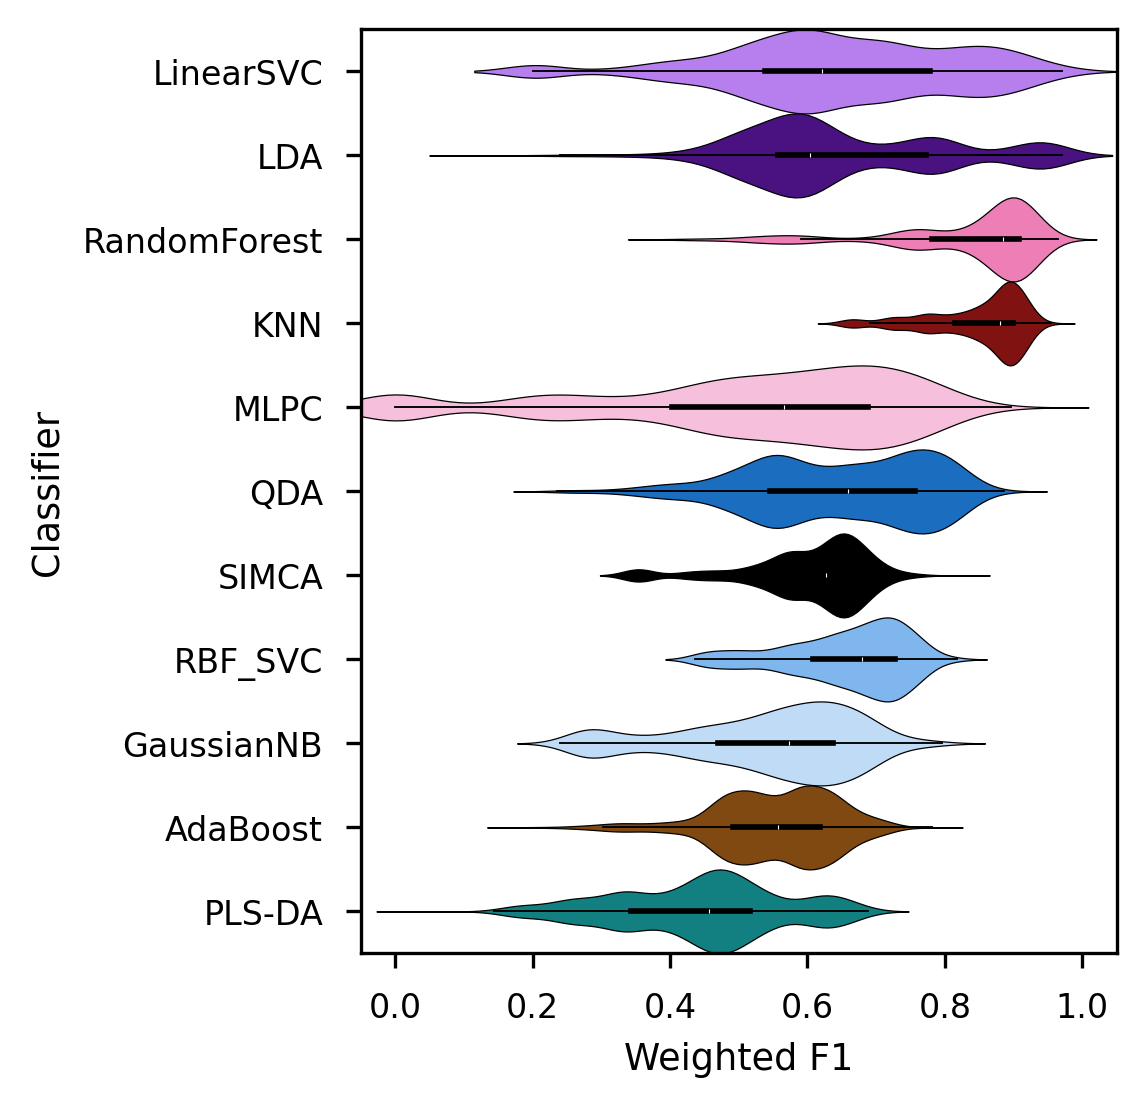

In [16]:
import seaborn as sns

fig,ax = plt.subplots(1,1, figsize=(3.25, 4))
sns.violinplot(df.sort_values('F1_weighted',ascending=False),
               x='F1_weighted',y='Classifier',
               hue='Classifier',
               palette=misc.dict_cBlind['classifiers'],
               width=1)
ax.set(xlim=(-0.05,1.05))
ax.set(xlabel='Weighted F1')

if save_files==True:
    plt.savefig(f'{newpath}/F1_violin_plot.{img_type}',dpi=1200,bbox_inches='tight')


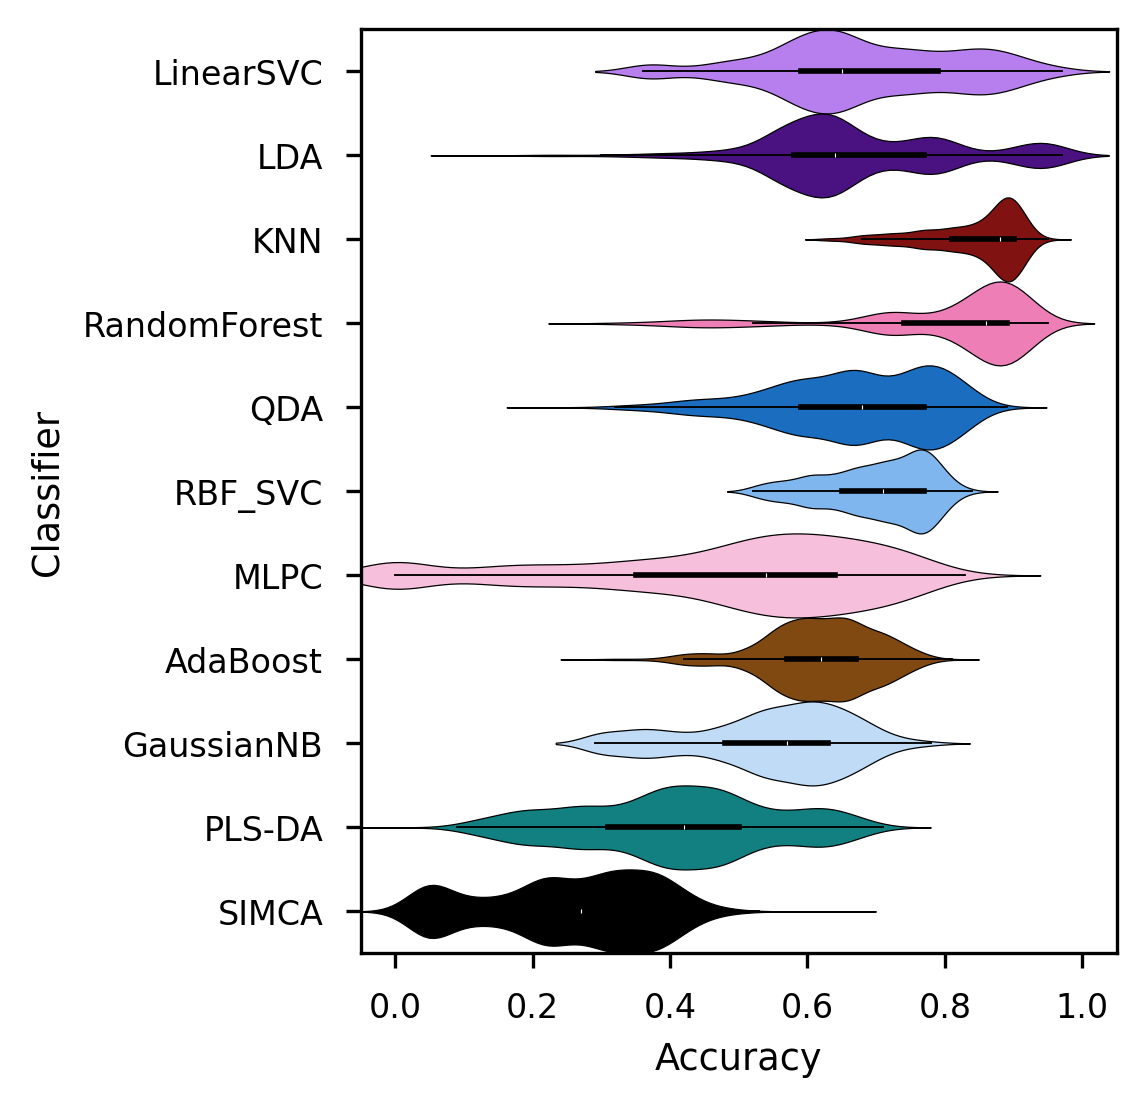

In [17]:

fig,ax = plt.subplots(1,1, figsize=(3.25, 4))
sns.violinplot(df.sort_values('Accuracy',ascending=False),
               x='Accuracy',y='Classifier',
               hue='Classifier',
               palette=misc.dict_cBlind['classifiers'],
               width=1)
ax.set(xlim=(-0.05,1.05))
if save_files==True:
    plt.savefig(f'{newpath}/Acc_violin_plot.{img_type}',dpi=1200,bbox_inches='tight')

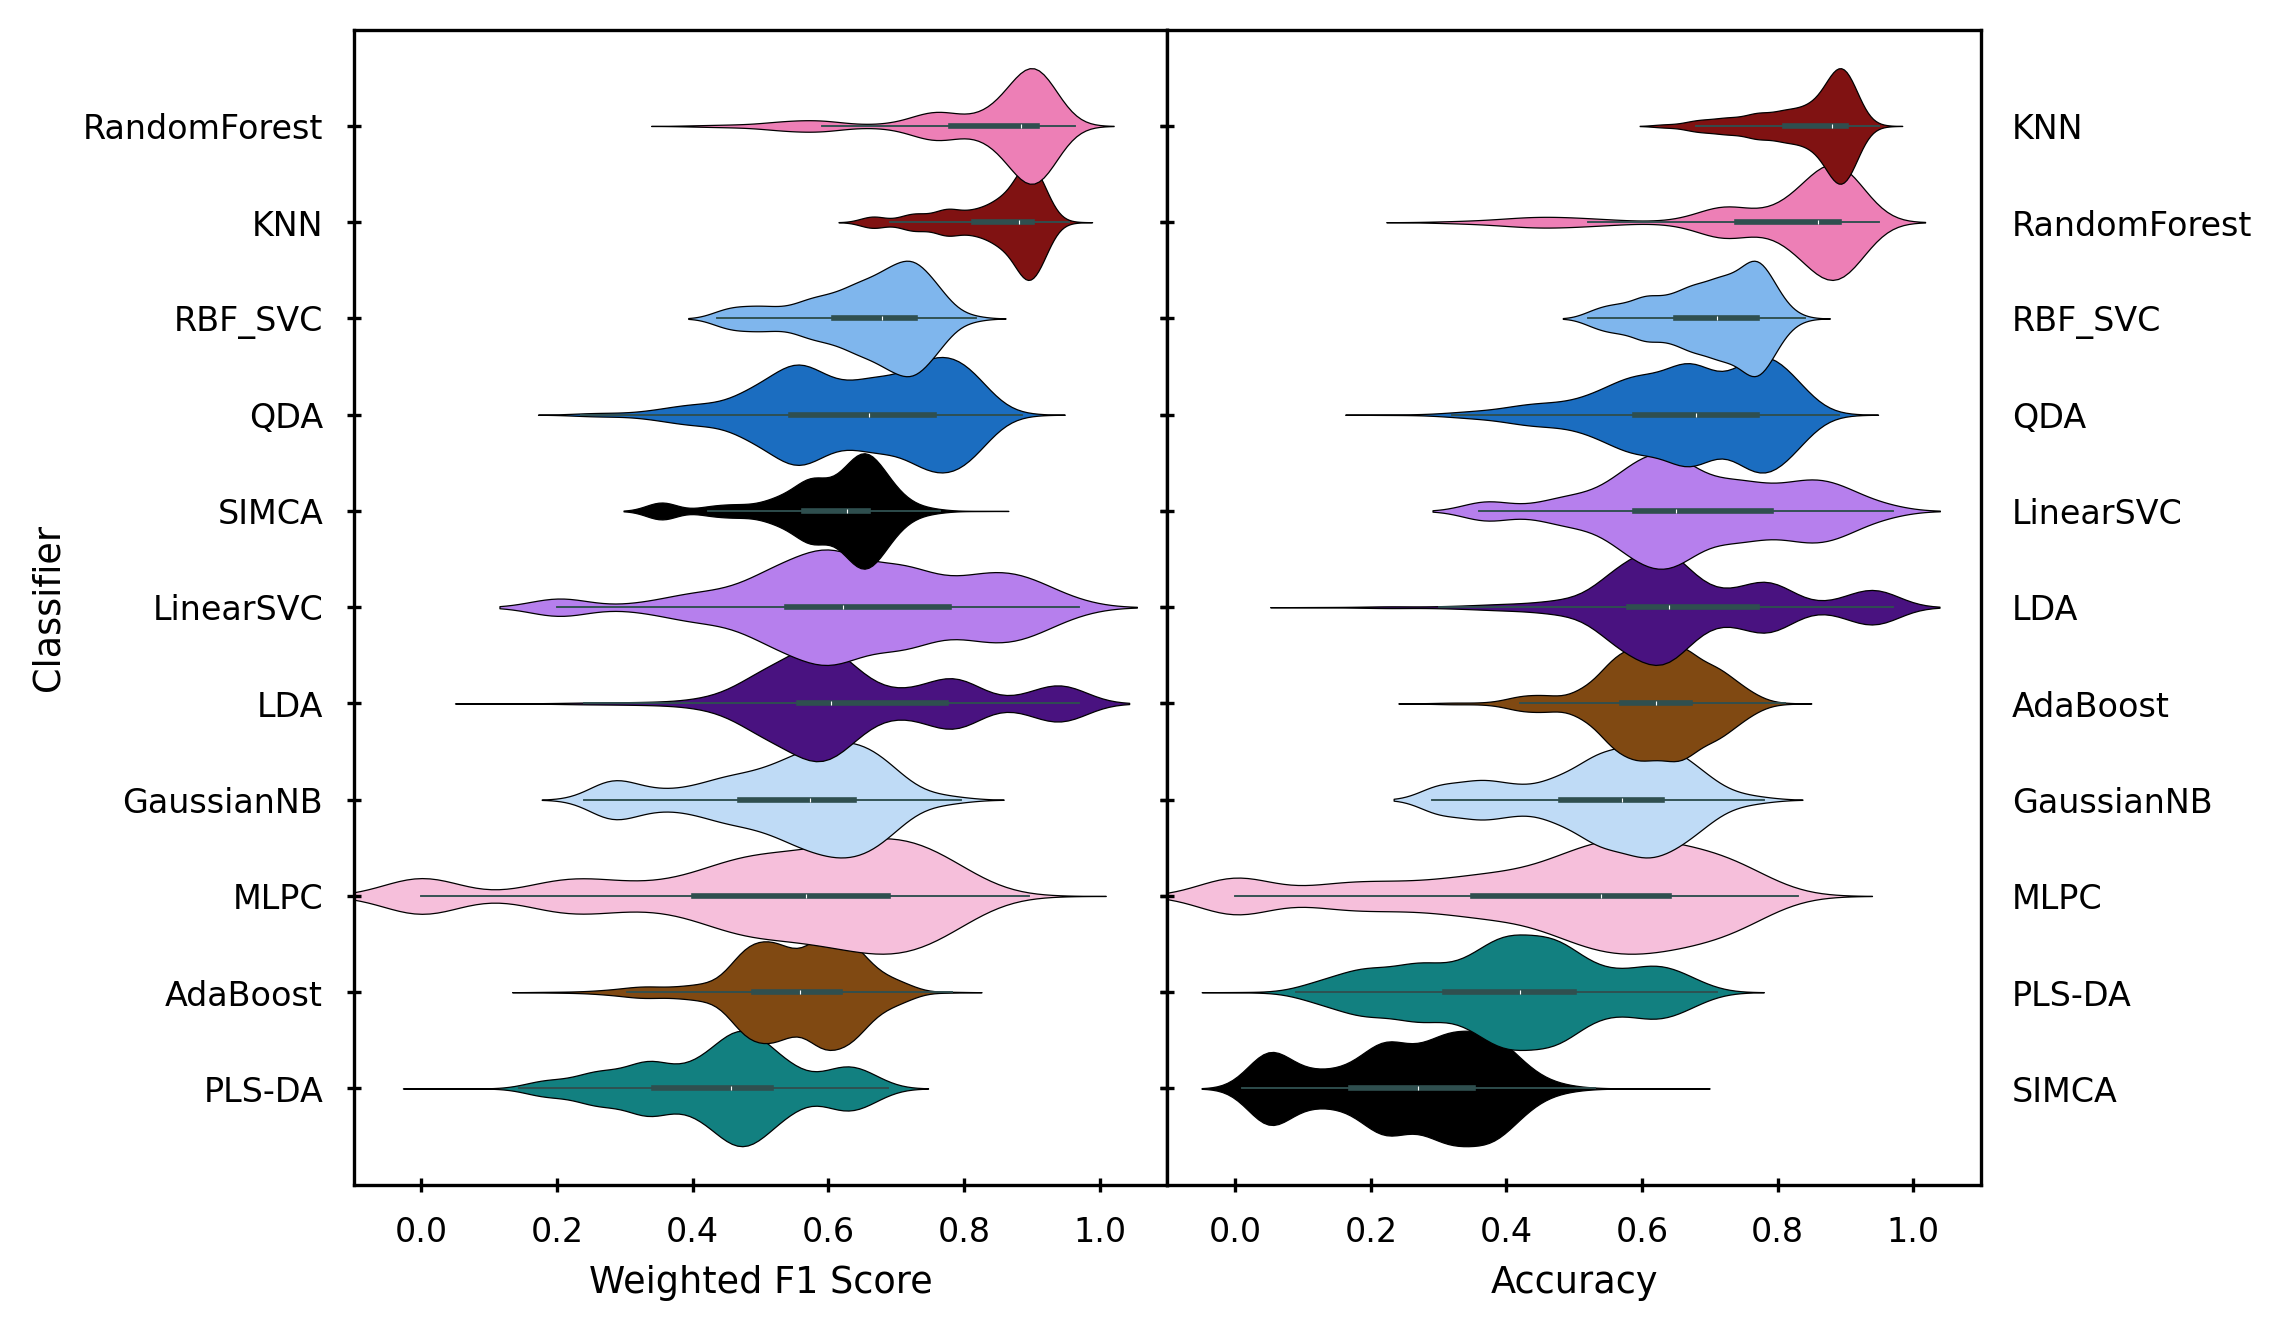

In [18]:
# Using pandas methods and slicing to determine the order by decreasing median
# you can change the .median to .mean, .max, or .min for comparisons
my_F1_order = df.groupby(by=["Classifier"])["F1_weighted"].median().sort_values().iloc[::-1].index[::-1]
my_Ac_order = df.groupby(by=["Classifier"])["Accuracy"].median().sort_values().iloc[::-1].index[::-1]


fig,axes = plt.subplots(1,2,figsize=(7,5), sharey=False, sharex=False,
                       gridspec_kw={'wspace':0, 'hspace':0})

sns.violinplot(df,
               x='F1_weighted',y='Classifier',
               order=my_F1_order,
               hue='Classifier',
               palette=misc.dict_cBlind['classifiers'],
               width=1.2, ax=axes.flatten()[0],
               )
sns.violinplot(df,
               x='Accuracy',y='Classifier',
               hue='Classifier',
               order=my_Ac_order,
               palette=misc.dict_cBlind['classifiers'],
               width=1.2, ax=axes.flatten()[1],
               )

for ax in axes.flatten():
    ax.set(xlim=(-0.1,1.1),
           ylim=(-1,11))

axes[0].tick_params(
                    right=True,
                    labelleft=True,
                    labelright=False,
                    direction="inout",
                )
axes[1].tick_params(
                    left=True,
                    labelleft=False,
                    labelright=True,
                    direction="inout",
                )
axes[0].set(xlabel='Weighted F1 Score')
axes[1].set(ylabel='')

bpc = 'darkslategrey'
for ax in axes:
    for bit in ax.get_children()[1:-10:4]:
        bit.set_color(bpc)  # <------------- changes the colour of the sticks
    for bit in ax.get_children()[2:-10:4]:
        bit.set_color(bpc)  # <------------- changes the colour of the boxes
    
if save_files==True:
    plt.savefig(f'{newpath}/dual_violin_plot.{img_type}',dpi=1200, bbox_inches='tight')

We can see that RandomForest scores very well by almost any metric! Let's keep that in mind while we try to see what preprocessing steps worked well.

## Visualize scores based on preprocessing pipelines

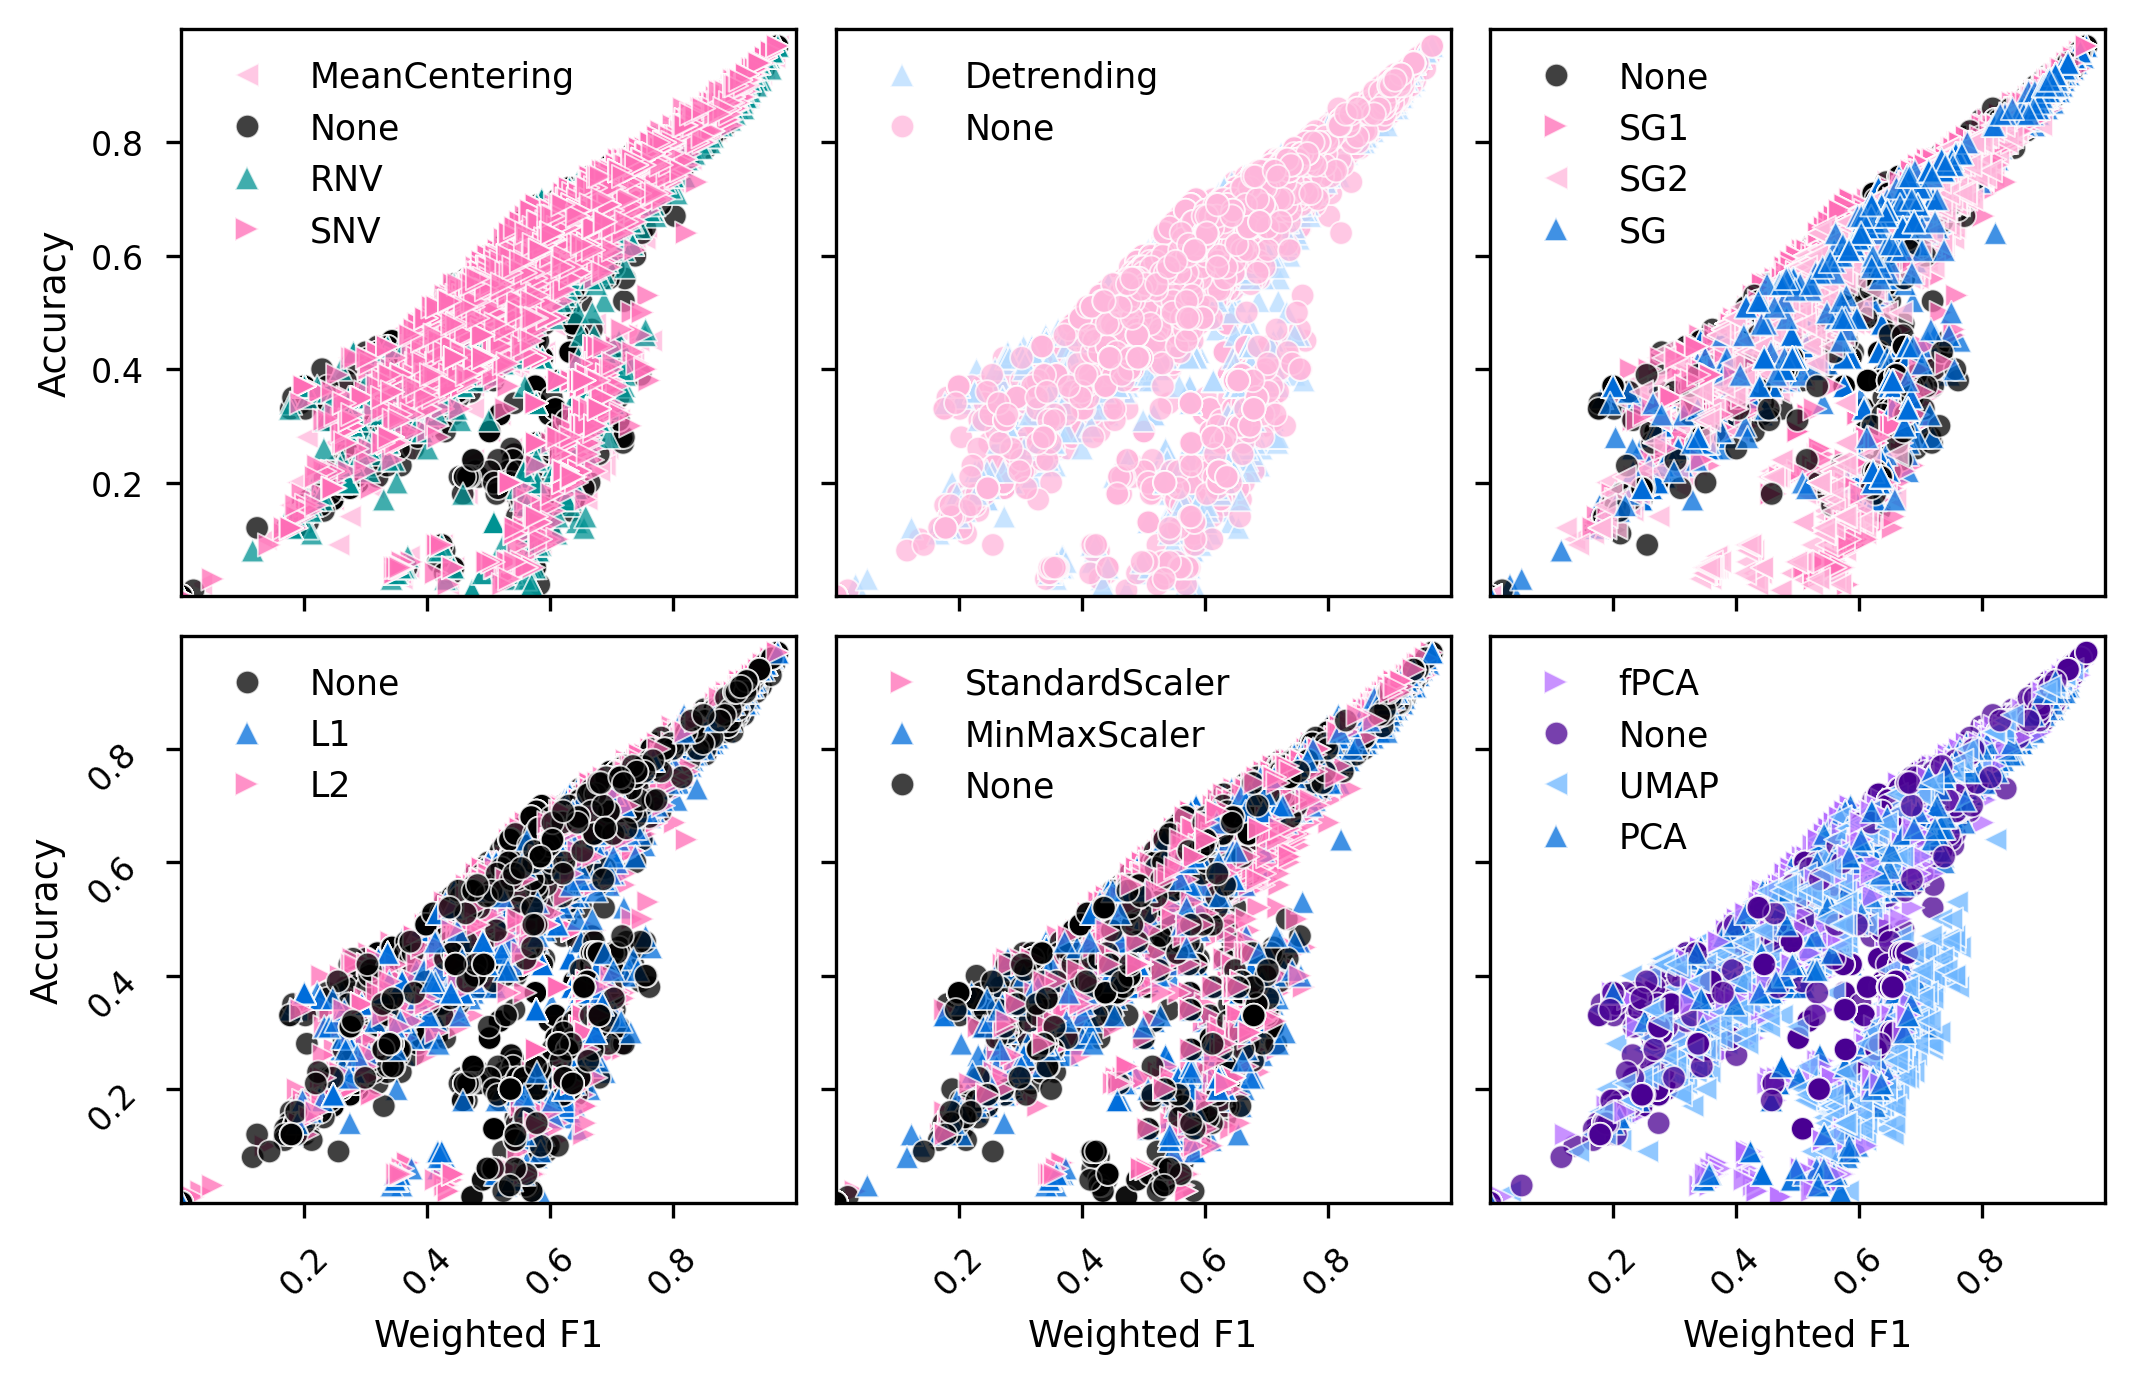

In [19]:
import re

sdf = pd.concat([df,df.Preprocessing.str.split('_',expand=True)],axis=1)
dict_numtopreproc = {0:'Preprocessing',1:'Detrending',2:'Smoothing',
                     3:'Normalization',4:'FeatureScaling',5:'DimReduction'}

fig, axes = plt.subplots(2,3, figsize=(7,4.5),
                        sharex=True, sharey=True,
                        layout="compressed")

for i in range(6):
    # plt.figure()
    # g = sns.scatterplot(sdf,x='Precision_weighted',y='Recall_weighted',
    ax = axes.flatten()[i]
    g = sns.scatterplot(sdf,x='F1_weighted',y='Accuracy',
                        hue=i,
                        palette=misc.dict_cBlind[dict_numtopreproc[i]],
                        style=i,
                        markers=misc.dict_shapes[dict_numtopreproc[i]],
                        alpha=0.75,
                        ax=ax)

    # adjust axis
    ax.set_xlabel(f'{avrg} F1'.title())
    ax.set_ylabel(f'Accuracy'.title())
    ax.set_xlim(0.0,1.0)
    ax.set_ylim(0.0,1.0)
    
    # Fix legend
    if i == 0:
        handles, labels = g.get_legend_handles_labels()
        handles = handles[0:]
        labels = labels[0:]

    else:
        handles, labels = g.get_legend_handles_labels()
    labels = [re.sub(r'None\d', 'None', lab) for lab in labels]
    hl = [(h,l) for h,l in zip(handles,labels)]
    hl.sort(key=lambda t: len(t[1]), reverse=True)
    handles2, labels2 = zip(*hl)
    g.legend(handles=handles2, labels=labels2,
             frameon=False, loc="upper left",
             fontsize='small')
    
    for lh in g.legend_.legend_handles: 
        lh.set_alpha(0.75)

for ax in axes[1,:]:
    ax.yaxis.set_ticks([0.2, 0.4, 0.6, 0.8])
    ax.yaxis.set_ticklabels(ax.get_yticks().tolist(), rotation=45)
for ax in axes[1,:]:
    ax.xaxis.set_ticks([0.2, 0.4, 0.6, 0.8])
    ax.xaxis.set_ticklabels(ax.get_xticks().tolist(), rotation=45)

if save_files==True:
    plt.savefig(f'{newpath}/All_TopPipes2x3.{img_type}',
            dpi=1200,bbox_inches='tight')

That's a lot...let's zoom in!

In [21]:
sdf.sort_values('Accuracy', ascending=False)

Unnamed: 0                 Data  \
6            6  AllColors-AllStates   
6            6  AllColors-AllStates   
6            6  AllColors-AllStates   
6            6  AllColors-AllStates   
4            4  AllColors-AllStates   
..         ...                  ...   
3            3  AllColors-AllStates   
3            3  AllColors-AllStates   
3            3  AllColors-AllStates   
3            3  AllColors-AllStates   
3            3  AllColors-AllStates   

                                    Preprocessing Classifier  Accuracy  \
6             SNV_None2_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   
6        RNV_Detrending_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   
6        SNV_Detrending_SG1_L1_MinMaxScaler_None6  LinearSVC      0.97   
6   MeanCentering_None2_SG1_L2_MinMaxScaler_None6  LinearSVC      0.97   
4         None1_None2_SG_None4_MinMaxScaler_None6        LDA      0.97   
..                                            ...        ...       ...   
3             MeanCentering_None2_SG_L1_None5_PCA       MLPC      0.00   
3                 RNV_Detrending_SG_L1_None5_fPCA       MLPC      0.00   
3                RNV_Detrending_SG_L1_None5_None6       MLPC      0.00   
3                  RNV_Detrending_SG_L1_None5_PCA       MLPC      0.00   
3                    SNV_None2_None3_L1_None5_PCA       MLPC      0.00   

    Precision_micro  Recall_micro  F1_micro  Precision_macro  Recall_macro  \
6              0.97          0.97      0.97         0.974067      0.976845   
6              0.97          0.97      0.97         0.974067      0.976845   
6              0.97          0.97      0.97         0.974067      0.976845   
6              0.97          0.97      0.97         0.974067      0.976845   
4              0.97          0.97      0.97         0.974786      0.967460   
..              ...           ...       ...              ...           ...   
3              0.00          0.00      0.00         0.000000      0.000000   
3              0.00          0.00      0.00         0.000000      0.000000   
3              0.00          0.00      0.00         0.000000      0.000000   
3              0.00          0.00      0.00         0.000000      0.000000   
3              0.00          0.00      0.00         0.000000      0.000000   

    ...  F1_weighted                                            Warning  \
6   ...     0.970046  [ConvergenceWarning('Liblinear failed to conve...   
6   ...     0.970046  [ConvergenceWarning('Liblinear failed to conve...   
6   ...     0.970046  [ConvergenceWarning('Liblinear failed to conve...   
6   ...     0.970046  [ConvergenceWarning('Liblinear failed to conve...   
4   ...     0.969545                                                 []   
..  ...          ...                                                ...   
3   ...     0.000000                                                 []   
3   ...     0.000000                                                 []   
3   ...     0.000000                                                 []   
3   ...     0.000000                                                 []   
3   ...     0.000000                                                 []   

                                            Data_Pipe  \
6   AllColors-AllStates_SNV_None2_SG1_L2_MinMaxSca...   
6   AllColors-AllStates_RNV_Detrending_SG1_L2_MinM...   
6   AllColors-AllStates_SNV_Detrending_SG1_L1_MinM...   
6   AllColors-AllStates_MeanCentering_None2_SG1_L2...   
4   AllColors-AllStates_None1_None2_SG_None4_MinMa...   
..                                                ...   
3   AllColors-AllStates_MeanCentering_None2_SG_L1_...   
3   AllColors-AllStates_RNV_Detrending_SG_L1_None5...   
3   AllColors-AllStates_RNV_Detrending_SG_L1_None5...   
3   AllColors-AllStates_RNV_Detrending_SG_L1_None5...   
3    AllColors-AllStates_SNV_None2_None3_L1_None5_PCA   

                                            Full_Pipe              0  \
6   AllColors-AllStates_SNV_None2_SG1_L2_MinMaxSca.

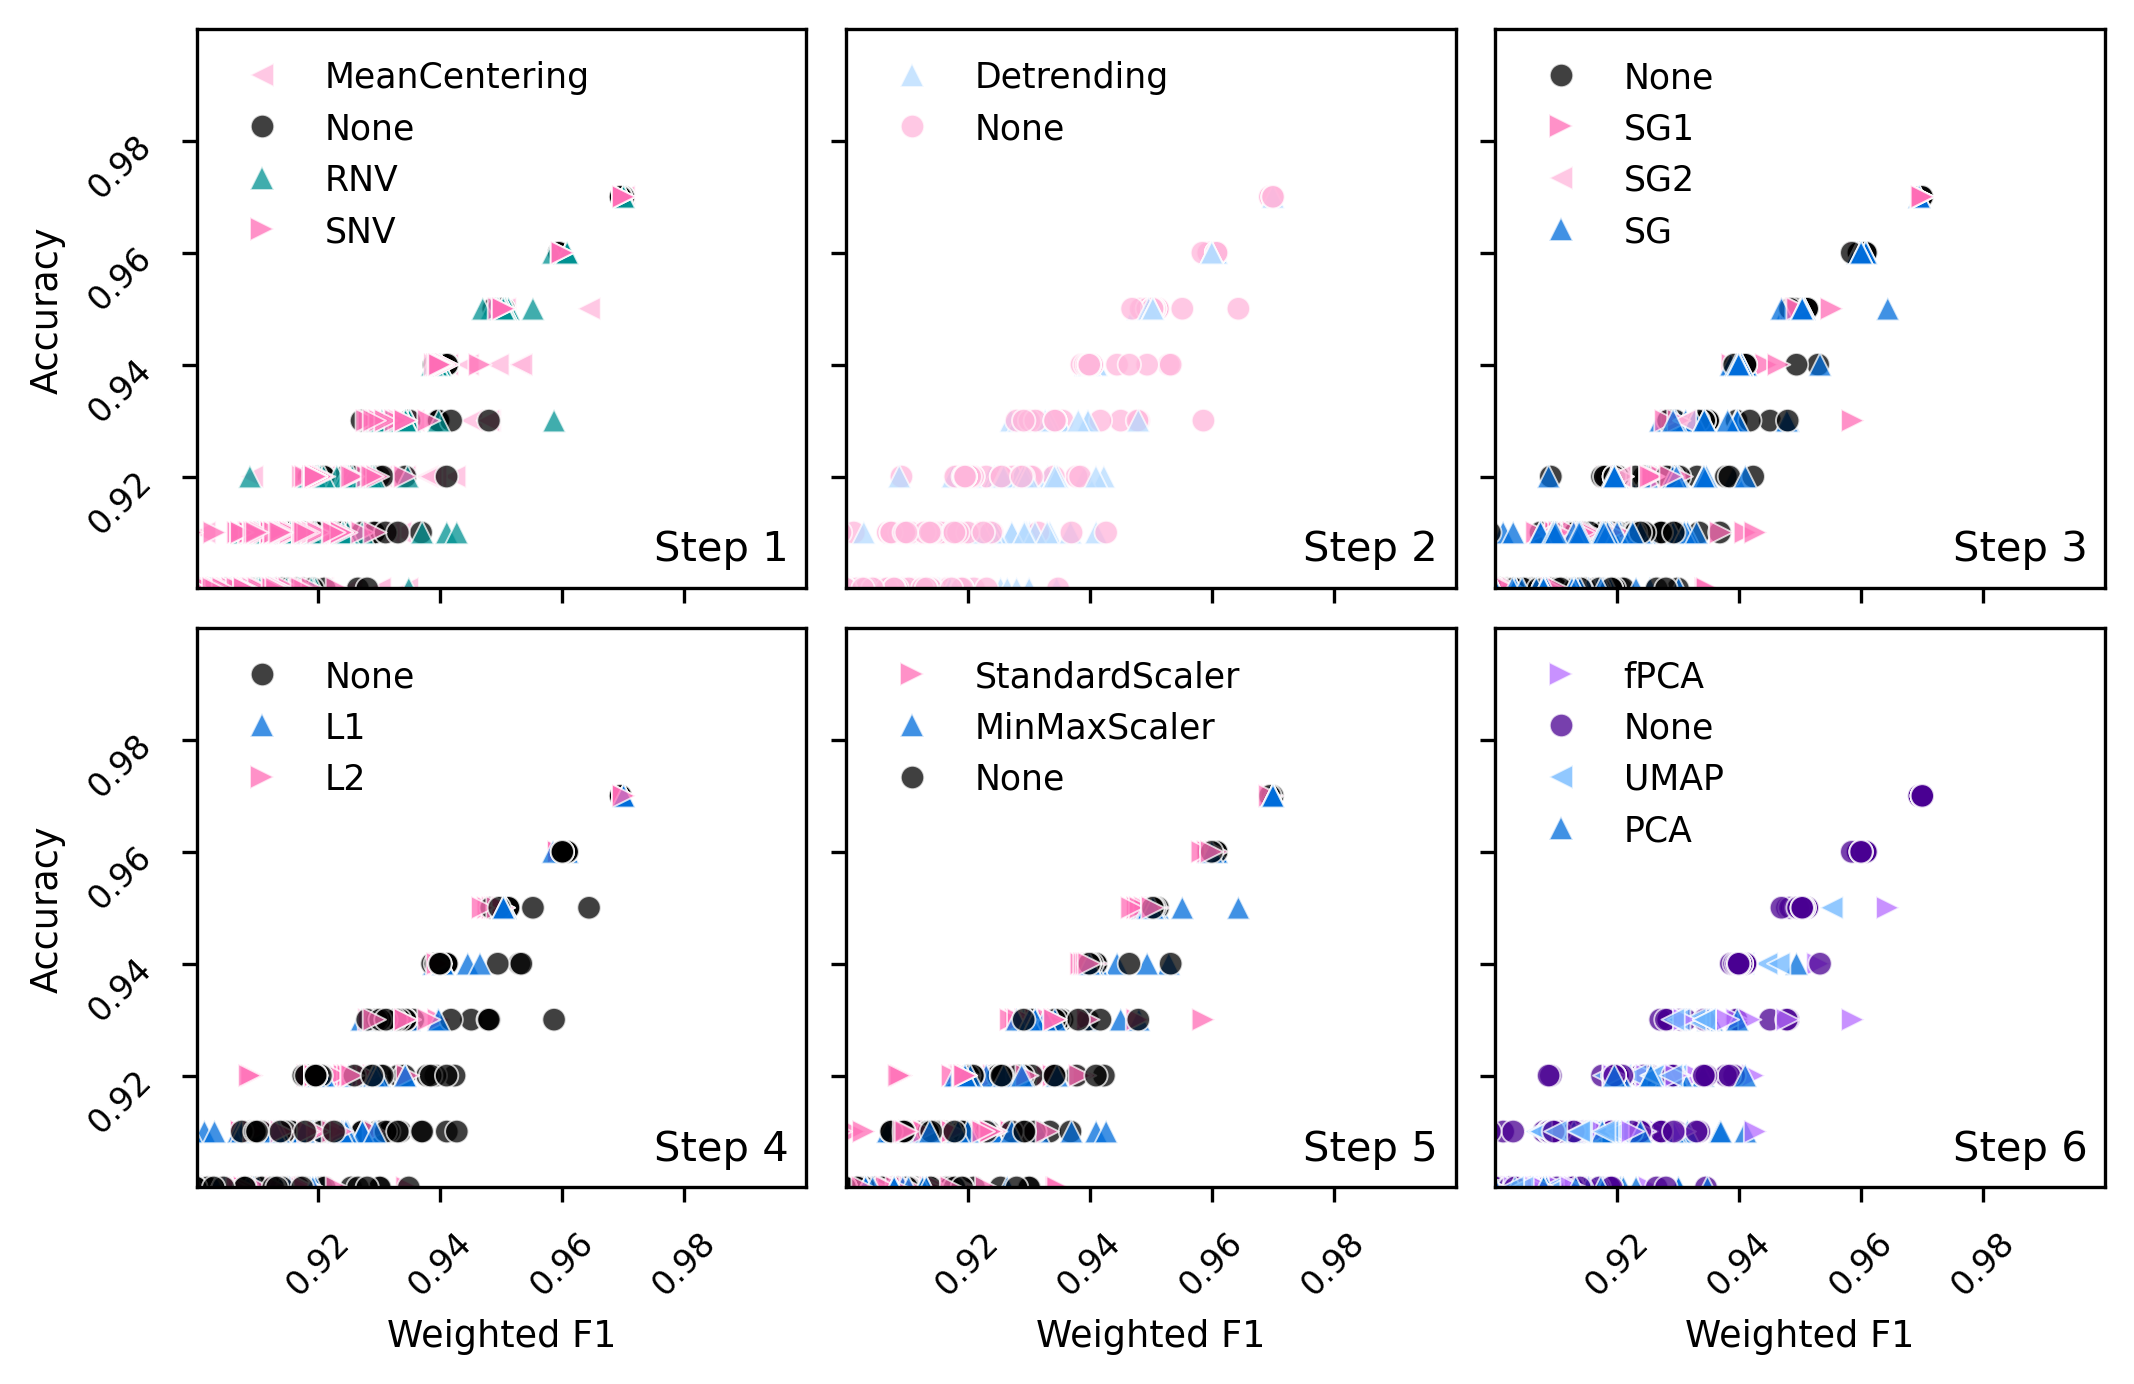

In [22]:
import numpy as np

sdf= pd.concat([sub_df,sub_df.Preprocessing.str.split('_',expand=True)],axis=1)
# The previous line will introduce new columns with numbers 0-5 for names
# we need to convert these to meaningful names
dict_numtopreproc = {0:'Preprocessing',1:'Detrending',2:'Smoothing',
                     3:'Normalization',4:'FeatureScaling',5:'DimReduction'}

fig, axes = plt.subplots(2,3, figsize=(7,4.5),
                        sharex=True, sharey=True,
                        layout="compressed")

for i in range(6):
    ax = axes.flatten()[i]
    g = sns.scatterplot(sdf,x='F1_weighted',y='Accuracy',
                        hue=i, # Note: this will reference the column with the name {i}
                        palette=misc.dict_cBlind[dict_numtopreproc[i]],
                        style=i,
                        markers=misc.dict_shapes[dict_numtopreproc[i]],
                        alpha=0.75,
                        ax=ax)
    # adjust axis
    ax.set_xlabel(f'{avrg} F1'.title())
    ax.set_ylabel(f'Accuracy'.title())
    ax.set_xlim(0.9,1.0)
    ax.set_ylim(0.9,1.0)
    
    # Fix legend
    if i == 0:
        handles, labels = g.get_legend_handles_labels()
        handles = handles[0:]
        labels = labels[0:]

    else:
        handles, labels = g.get_legend_handles_labels()

    labels = [re.sub(r'None\d', 'None', lab) for lab in labels]
    hl = [(h,l) for h,l in zip(handles,labels)]
    hl.sort(key=lambda t: len(t[1]), reverse=True)
    handles2, labels2 = zip(*hl)
    g.legend(handles=handles2, labels=labels2,
             fontsize='small',
             frameon=False, loc="upper left")
    
    for lh in g.legend_.legend_handles: 
        lh.set_alpha(0.75)
        
for ax in axes[:,0]:
    ax.yaxis.set_ticks([0.92, 0.94, 0.96, 0.98])
    ax.yaxis.set_ticklabels(ax.get_yticks().tolist(), rotation=45)
    
for ax in axes[1,:]:
    ax.xaxis.set_ticks([0.92, 0.94, 0.96, 0.98])
    ax.xaxis.set_ticklabels(ax.get_xticks().tolist(), rotation=45)
    
for i in np.arange(len(axes.flatten())):
    axes.flatten()[i].annotate(f'Step {i+1}', xy=[0.75,0.05],
             xycoords='axes fraction')    
    
if save_files==True:
    plt.savefig(f'{newpath}/All_TopPipes2x3_zoomed.{img_type}',
            dpi=1200,bbox_inches='tight')

Now we can start to pull out some information about our high-scoring pipelines. In many cases there doesn't seem to be a noteable difference between the steps, meaning we probably don't need to use those steps.

For the manuscript data we saw a noticeable differences from Steps 1,2, and 5. Step 6 (dimensionality reduction) severly hamper the classification, SavGol filtering was overly complicated for minimal benefit, and sample normalization was mostly redundant after RNV or SNV.